In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

# Wine Quality Analysis

***

* freature engineering
* visualization
* analysis

###### The goal of the analysis is to investigate the relationships between different factors and quality of wine.  Also, building models to predict the quality of wine and testing the performace of different models.

***

Citation Request:

  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at:  [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                 [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
import os
os.getcwd()

'C:\\Users\\mac\\desktop\\datascience\\prj'

In [5]:
df.to_csv('wine_clas.csv')

In [6]:
df_old=df.copy()

In [7]:
df=df_old

In [8]:
df.shape

(4898, 12)

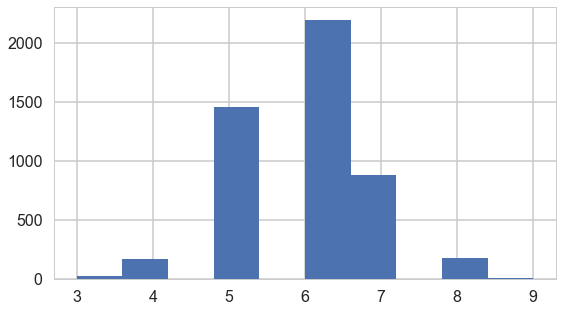

In [9]:
df.quality.hist(figsize=(9,5))

In [10]:
df['target']=(df.quality.values>=7)*1

In [11]:
del df['quality']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [12]:
print 'good wine % all wine ',round(df.target.values.sum()/float( df.shape[0]),3)*100,'%'

good wine % all wine  21.6 %


The percentage above shows the proporation of good wine is much less that of not-good wine

### 0. Training testing split & Standardize data

In [13]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [15]:
mask

array([ True, False,  True, ...,  True, False,  True], dtype=bool)

In [16]:
mask.shape,mask.sum()

((4898L,), 3428)

In [17]:
print 'training % of positive',np.mean(df[mask].target)
print 'testing % of positive',np.mean(df[~mask].target)

training % of positive 0.21674445741
testing % of positive 0.215646258503


In [18]:
target=df['target']

In [19]:
df=df.ix[:,:-1]

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [21]:
# Contents below are wrong
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# n1=np.array(df[mask])
# m1=np.array(df)

# scaler = StandardScaler().fit(n1)
# t1=scaler.transform(m1)   
# df[mask]=pd.DataFrame(t1)
# df[mask].head()

In [33]:
cols=np.array(df.columns)
cols

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], dtype=object)

In [34]:
from sklearn.preprocessing import StandardScaler
for col in cols:
    print col
    valstrain=df[col].values[mask]
    valstest=df[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    df[col]=out

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.167655,-0.079933,0.215302,2.803635,-0.026812,0.583827,0.755075,2.308318,-1.231724,-0.342861,-1.399428
1,-0.660474,0.221066,0.051961,-0.950204,0.159716,-1.243872,-0.138749,-0.014399,0.734782,0.006939,-0.827909
2,1.469000,0.020400,0.541983,0.091437,0.206347,-0.300543,-0.962008,0.350599,0.472581,-0.430311,-0.338035
3,0.404263,-0.481264,-0.111379,0.405895,0.579402,0.701743,1.131421,0.516508,0.013730,-0.780112,-0.501327
4,0.404263,-0.481264,-0.111379,0.405895,0.579402,0.701743,1.131421,0.516508,0.013730,-0.780112,-0.501327


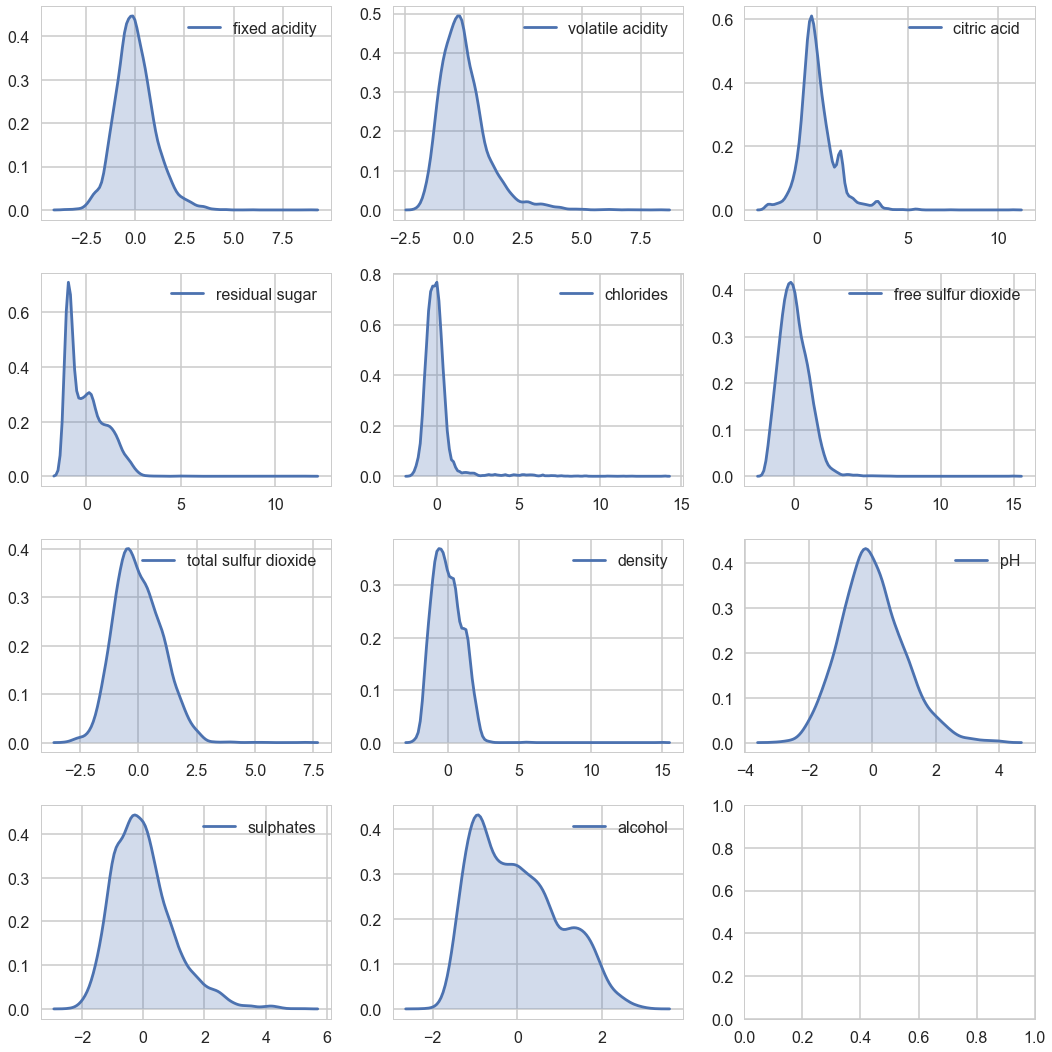

In [36]:
dfgb=df.copy()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
#     for k, v in dfgb[p]:
        sns.kdeplot(dfgb[p], ax=ax, label=str(p),shade=True)

In [37]:
df.alcohol.mean()

-1.2591896583090383e-15

In [38]:
df['target']=target

In [39]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,0.167655,-0.079933,0.215302,2.803635,-0.026812,0.583827,0.755075,2.308318,-1.231724,-0.342861,-1.399428,0
1,-0.660474,0.221066,0.051961,-0.950204,0.159716,-1.243872,-0.138749,-0.014399,0.734782,0.006939,-0.827909,0


### 1. To find the relationship between continous features indivdidually and repsonse variable target.

target
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: pH, dtype: object

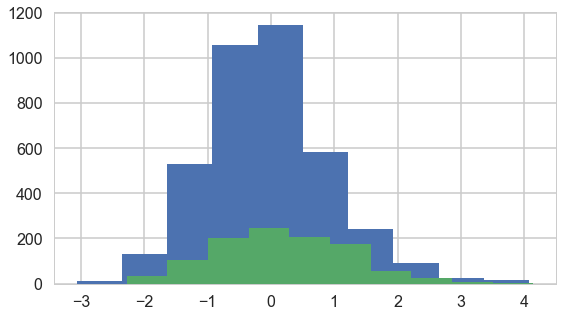

In [40]:
df.groupby('target').pH.hist(figsize=(9,5))

We take a look the pH values with wine classes. So for class of good wine average ph is 3.3 and for bad wine is about the same. 
So the feature pH is not a good feature to separate good wine from bad wine. 

So in the following step we will look more features visiually to detect potentioal predictors.

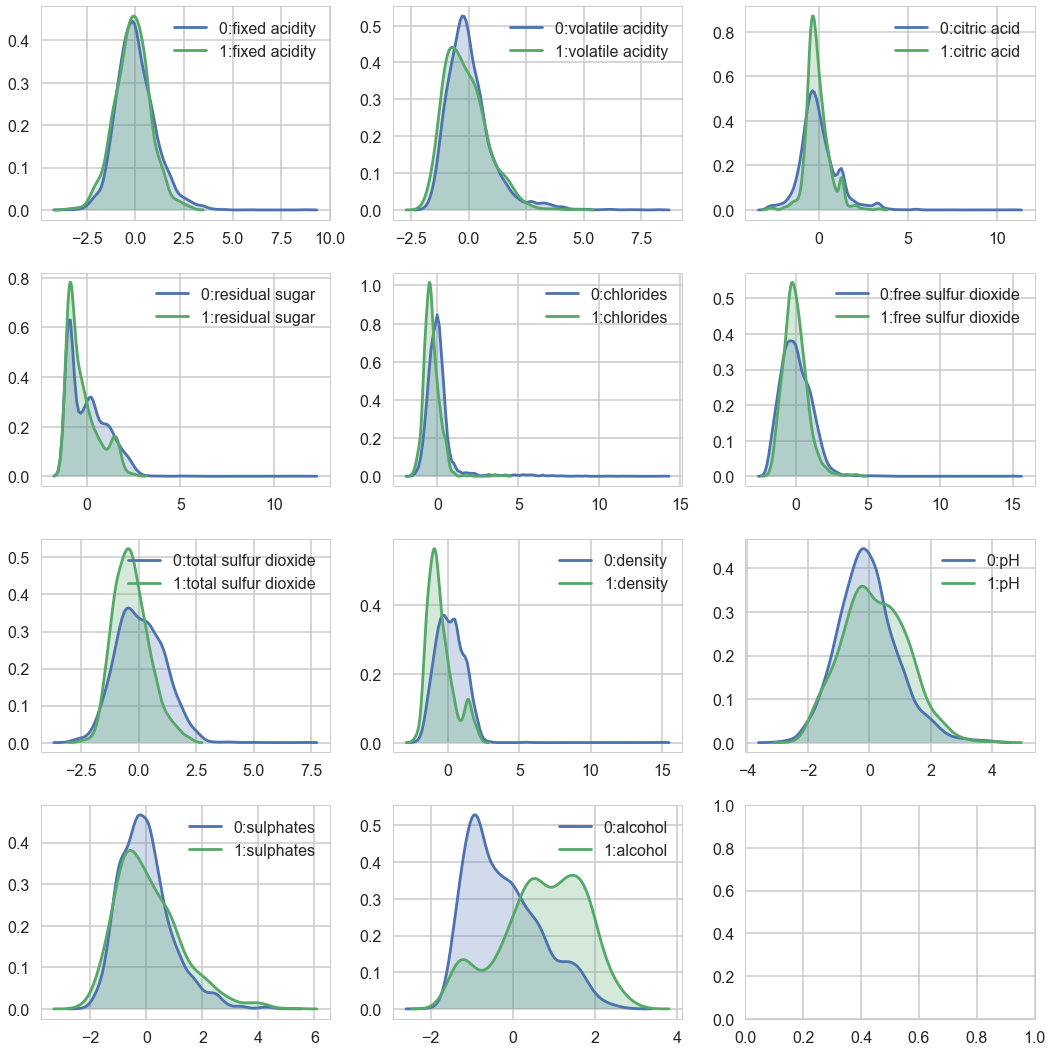

In [42]:
dfgb=df.groupby('target')
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), cols):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name,shade=True)

In the KDE plots we’re looking for variables with very little overlap between the positive and negative results. Some examples is "alcohol. 

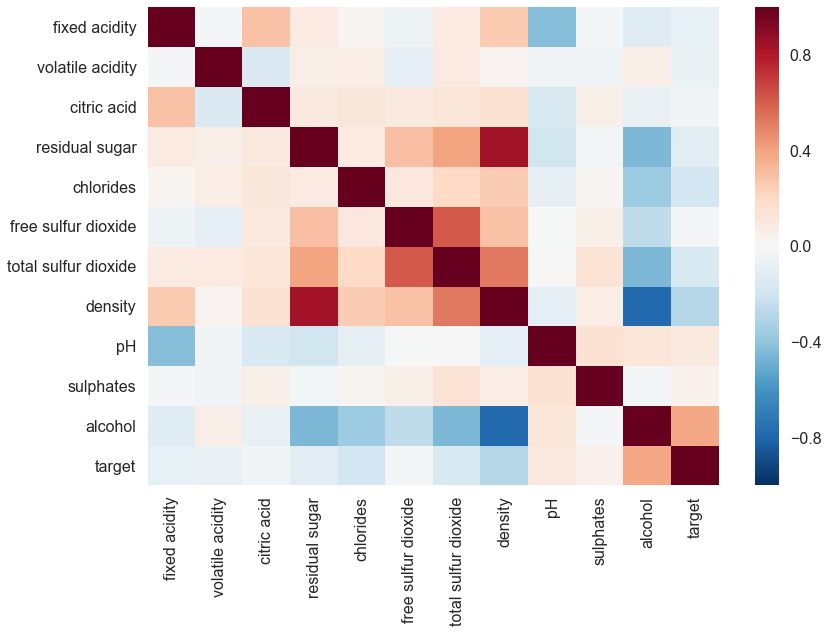

In [43]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 2.Building Models

In [44]:
Xmatrix=df[cols].values
Yresp=df['target'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [45]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
#     print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [46]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [47]:
from sklearn.svm import LinearSVC

In [187]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), 
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, df,cols, 'target',1, mask=mask,score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.78
[[1147   10]
 [ 308    5]]
########################################################
Wall time: 1.84 s


In [188]:
gs=clfsvm
print "BEST", gs.C

BEST 100.0


In [189]:
from sklearn.metrics import roc_curve, auc

In [190]:
from sklearn.svm import SVC

In [191]:
%%time
clfsvc, Xtrain, ytrain, Xtest, ytest = do_classify(SVC(), 
                                                  {"C": [1e5,1e7,1e9],"gamma":[1e-5,1e-07,1e-9]}, df,cols, 'target',1, mask=mask,score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.82
[[1103   54]
 [ 213  100]]
########################################################
Wall time: 30.1 s


In [192]:
gs=clfsvc
print "BEST", gs.C, gs.gamma

BEST 1000000000.0 1e-05


In [193]:
%%time
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(20, 30),"max_features":range(3,5),"max_depth": [ 4, 5, 6, 7], 'min_samples_leaf': [  3, 4, 5, 6]}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df,cols, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.88
Accuracy on test data:     0.85
[[1117   40]
 [ 185  128]]
########################################################
Wall time: 59.4 s


In [194]:
gs=clfForest
print "BEST", gs.n_estimators, gs.max_features,gs.max_depth,gs.min_samples_leaf

BEST 24 4 7 3


In [195]:
import xgboost as xgb
clfXgb = xgb.XGBClassifier()

In [196]:
%%time
parameters = {"n_estimators": range(1, 20),"reg_alpha":[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clfXgb, Xtrain, ytrain, Xtest, ytest = do_classify(clfXgb, parameters, 
                                                       df,cols,  'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nt

############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[1118   39]
 [ 235   78]]
########################################################
Wall time: 6 s


C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [197]:
gs=clfXgb
print "BEST", gs.n_estimators, gs.reg_alpha

BEST 17 10.0


In [198]:
%%time
#your code here
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100,1e3,1e4]}
clflog, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters,df,cols,  'target',1, mask=mask,score_func='f1')
# average_profit_pp(ytest, clflog.predict(Xtest), u)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.81
[[1093   64]
 [ 217   96]]
########################################################
Wall time: 1.32 s


In [199]:
gs=clflog
print "BEST", gs.C

BEST 100


In [200]:
%%time
#your code here
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l2")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100,1000]}
clflog_2, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters,df,cols,  'target',1, mask=mask,score_func='f1')
# average_profit_pp(ytest, clflog.predict(Xtest), u)

using mask


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.80
[[1083   74]
 [ 221   92]]
########################################################
Wall time: 388 ms


In [201]:
gs=clflog_2
print "BEST", gs.C

BEST 0.001


In [79]:
dfuse=df.ix[:,:-1]

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(dfuse)

In [99]:
print pca.explained_variance_ratio_.sum()

0.998124342525


In [100]:
pca.components_[0]

array([ 0.15721398,  0.00504888,  0.14388525,  0.42740048,  0.21208579,
        0.30033982,  0.40669353,  0.51152204, -0.12905135,  0.04335126,
       -0.43716329])

In [101]:
pca.explained_variance_ratio_*100

array([ 29.30222906,  14.31413205,  11.11029411,   9.26150621,
         8.84203944,   8.52956134,   6.6093407 ,   5.44947404,
         3.76212213,   2.63173516])

In [103]:
df_pca = pd.DataFrame({"target": df['target'].values})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df_pca["pc%i" % (i+1)] = X[:,i]
df_pca.head()

,target,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0,3.668578,-0.525851,0.912351,-1.122427,-0.283853,-0.877295,0.202515,-1.014540,0.143659,-0.071646
1,0,-0.637458,0.435063,0.352846,1.012031,-0.703542,-0.473902,0.432809,0.580390,-1.067590,-0.254210
2,0,0.157844,-1.179089,0.012311,0.283031,-0.360284,-0.485124,0.546085,0.971125,0.548441,0.852968
3,0,1.460142,0.110075,-0.011983,-0.408215,-0.478272,0.784482,-0.202221,0.600262,0.292097,-0.404171
4,0,1.460142,0.110075,-0.011983,-0.408215,-0.478272,0.784482,-0.202221,0.600262,0.292097,-0.404171


In [104]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
c=[c0,c2]

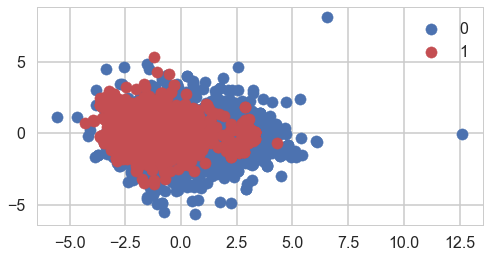

In [119]:
plt.figure(figsize=(8,4))
colors = [c0, c2]
for label, color in zip(df_pca['target'].unique(), colors):
    mask_pca = df_pca['target']==label
    plt.scatter(df_pca[mask_pca]['pc1'], df_pca[mask_pca]['pc2'], c=color, label=label)
plt.legend()

In [128]:
df_pca=df_pca.ix[:,:6]

In [129]:
df_pca.head()

,target,pc1,pc2,pc3,pc4,pc5
0,0,3.668578,-0.525851,0.912351,-1.122427,-0.283853
1,0,-0.637458,0.435063,0.352846,1.012031,-0.703542
2,0,0.157844,-1.179089,0.012311,0.283031,-0.360284
3,0,1.460142,0.110075,-0.011983,-0.408215,-0.478272
4,0,1.460142,0.110075,-0.011983,-0.408215,-0.478272


In [132]:
pca_cols=df_pca.columns[1:]

In [180]:
%%time
#your code here
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100,1e3,1e4]}
clflog, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters,df_pca,pca_cols,  'target',1, mask=mask,score_func='f1')
# average_profit_pp(ytest, clflog.predict(Xtest), u)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.80
[[1118   39]
 [ 260   53]]
########################################################
Wall time: 262 ms


In [175]:
%%time
#your code here
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l2")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100,1e3,1e4]}
clflog_2, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters,df_pca,pca_cols,  'target',1, mask=mask,score_func='f1')
# average_profit_pp(ytest, clflog.predict(Xtest), u)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.80
[[1105   52]
 [ 247   66]]
########################################################
Wall time: 252 ms


In [134]:
%%time
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(20, 30),"max_features":range(3,5),"max_depth": [ 4, 5, 6, 7], 'min_samples_leaf': [  3, 4, 5, 6]}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df_pca,pca_cols,  'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.83
[[1109   48]
 [ 207  106]]
########################################################
Wall time: 1min 18s


In [135]:
%%time
parameters = {"n_estimators": range(1, 20),"reg_alpha":[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clfXgb, Xtrain, ytrain, Xtest, ytest = do_classify(clfXgb, parameters, 
                                                       df_pca,pca_cols,  'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nt

using mask


C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Anaconda2

############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.80
[[1087   70]
 [ 223   90]]
########################################################
Wall time: 5.94 s


C:\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [141]:
%%time
clfsvc, Xtrain, ytrain, Xtest, ytest = do_classify(SVC(), 
                                                  {"C": [1e5,1e7,1e9],"gamma":[1e-5,1e-07,1e-9]}, df_pca,pca_cols, 'target',1, mask=mask,score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.80
[[1131   26]
 [ 261   52]]
########################################################
Wall time: 18.8 s


In [140]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), 
                                                   {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},df_pca,pca_cols, 'target',1, mask=mask,score_func='f1')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:     0.79
[[1157    0]
 [ 313    0]]
########################################################
Wall time: 1.27 s


In [138]:
from sklearn.naive_bayes import GaussianNB

In [185]:
X=df[cols].values
y=df['target'].values
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
itr,ite=train_test_split(range(y.shape[0]))
Xtr=X[itr]
Xte=X[ite]
ytr=y[itr]
yte=y[ite]
clf.fit(Xtr,ytr)
print "Frac of correctly labeled points",1-float((yte != clf.predict(Xte)).sum())/yte.shape[0]
confusion_matrix(clf.predict(Xte),yte)

Frac of correctly labeled points 0.749387755102


array([[725,  71],
       [236, 193]])

In [147]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

X=df_pca[pca_cols].values
y=df_pca['target'].values
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
itr,ite=train_test_split(range(y.shape[0]))
Xtr=X[itr]
Xte=X[ite]
ytr=y[itr]
yte=y[ite]
clf.fit(Xtr,ytr)
print "Frac of correctly labeled points",1-float((yte != clf.predict(Xte)).sum())/yte.shape[0]
confusion_matrix(clf.predict(Xte),yte)

Frac of correctly labeled points 0.783673469388


array([[906, 208],
       [ 57,  54]])

In [148]:
from sklearn.metrics import roc_curve, auc

In [152]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in xrange(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

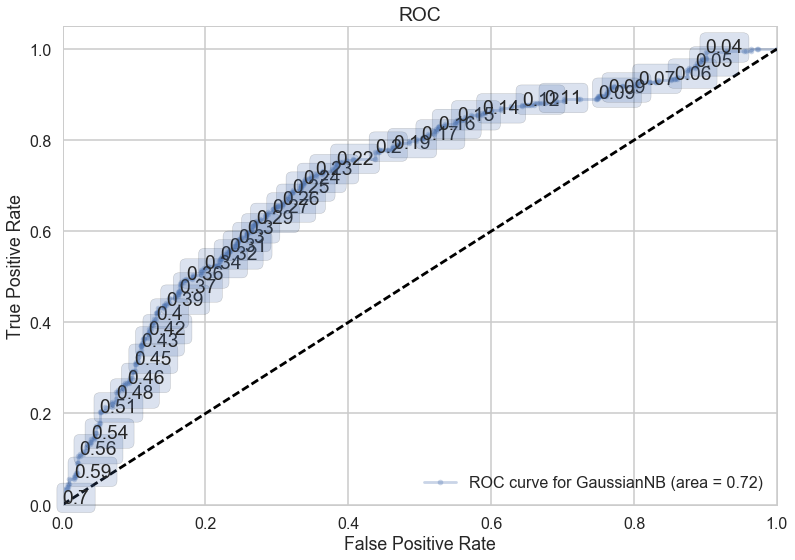

In [179]:
make_roc("GaussianNB", clf, yte, Xte, labe=10)

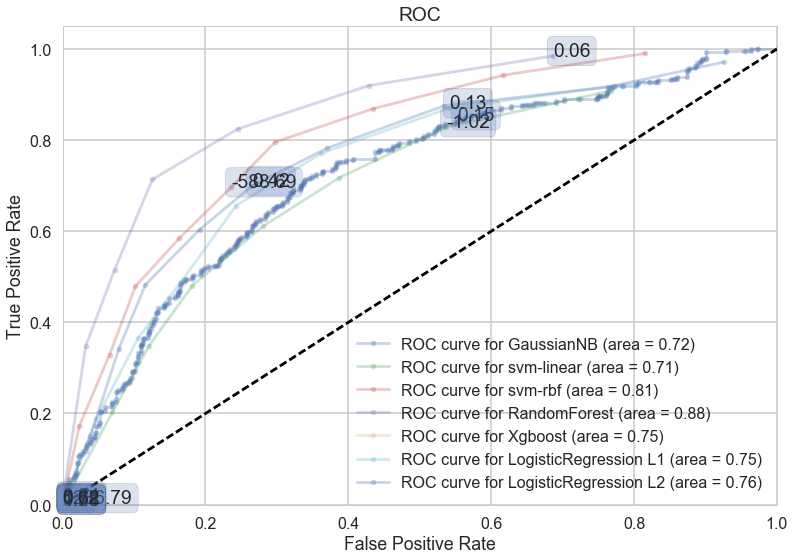

In [184]:
ax = make_roc("GaussianNB",clf, yte, Xte, None, labe=300)
make_roc("svm-linear",clfsvm,  yte, Xte, ax, labe=300, proba=False, skip=50);
make_roc("svm-rbf",clfsvc, ytest, Xtest, ax, labe=250, proba=False, skip=50);
make_roc("RandomForest",clfForest,  yte, Xte, ax, labe=300,  skip=50);
make_roc("Xgboost",clfXgb, ytest, Xtest, ax, labe=250,  skip=50);
make_roc("LogisticRegression L1", clflog,  yte, Xte, ax, labe=300,  skip=50);
make_roc("LogisticRegression L2",clflog_2, ytest, Xtest, ax, labe=250,  skip=50);

In [203]:
# ax = make_roc("GaussianNB",clf, yte, Xte, None, labe=300)
make_roc("svm-linear",clfsvm,  yte, Xte, ax, labe=300, proba=False, skip=50);
make_roc("svm-rbf",clfsvc, ytest, Xtest, ax, labe=250, proba=False, skip=50);
make_roc("RandomForest",clfForest,  yte, Xte, ax, labe=300,  skip=50);
make_roc("Xgboost",clfXgb, ytest, Xtest, ax, labe=250,  skip=50);
make_roc("LogisticRegression L1", clflog,  yte, Xte, ax, labe=300,  skip=50);
make_roc("LogisticRegression L2",clflog_2, ytest, Xtest, ax, labe=250,  skip=50);

NotFittedError: Call fit before prediction